In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [59]:
base_path='/Users/emeunier/Documents/scai/'
path_generated = f'{base_path}/qeeyvkep/interence/infesteps_1000/20240604-135240_postprocesses.pkl'
path_clean = f'{base_path}/clean_images_2_postprocesses.pkl'

with open(path_generated, 'rb') as f : 
    generated = pickle.load(f)

with open(path_clean, 'rb') as f : 
    clean = pickle.load(f)

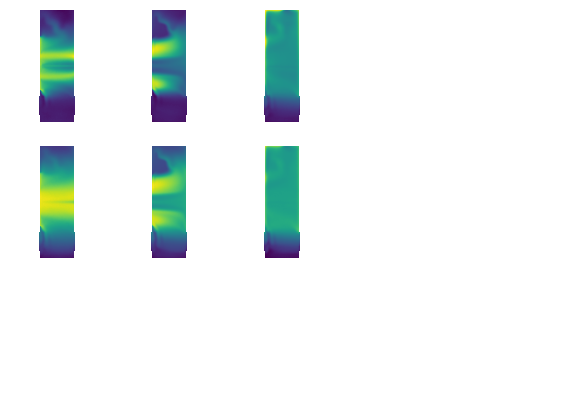

In [72]:
idx_sample = 0
fig, axs = plt.subplots(3, 5, figsize=(7, 5))
#fig.suptitle(f'Example Generated state {path}')
[ax.axis('off') for ax in axs.flatten()]
for j, key in enumerate(['toce.npy', 'soce.npy']) :
    for i, l in enumerate([0, 15, 30]): 
        axs[j, i].imshow(generated[key][idx_sample][l], origin='lower')

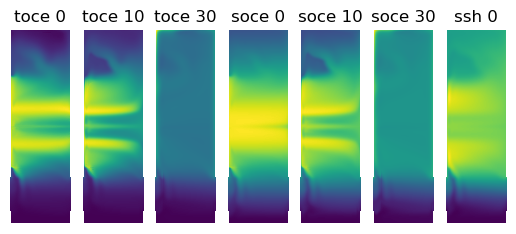

In [104]:
idx_sample=2
plt.Figure(figsize=(10,5))
[ax.axis('off') for ax in axs.flatten()]
shows = [('toce', 0), ('toce', 10), ('toce', 20), ('toce', 30),
         ('soce', 0), ('soce', 10), ('toce', 20), ('soce', 30), ('ssh', 0)]

for i, (key, idx) in enumerate(shows) : 
    plt.subplot(1, len(shows), i+1) 
   # plt.title(f'{key} {idx}')
    plt.imshow(clean[key+'.npy'][idx_sample][idx], origin='lower')
    plt.axis('off')

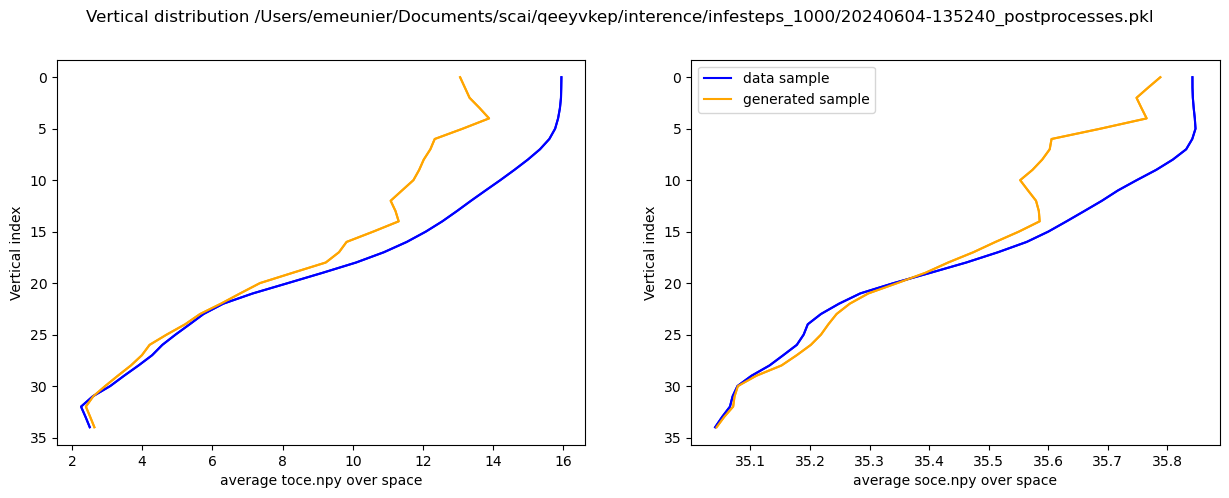

In [48]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle(f'Vertical distribution {path}')
for i, key in enumerate(['toce.npy', 'soce.npy']) :
    axs[i].plot(np.nanmean(clean[key][0], axis=(1,2)), np.arange(35), label='data sample', c='blue')
    axs[i].plot(np.nanmean(generated[key][0], axis=(1,2)), np.arange(35), label='generated sample', c='orange')
    axs[i].invert_yaxis()
    axs[i].plot(np.nanmean(clean[key][0], axis=(1,2)), np.arange(35), c='blue')
    axs[i].plot(np.nanmean(generated[key][0], axis=(1,2)), np.arange(35), c='orange')

    axs[i].set_xlabel(f'average {key} over space')
    axs[i].set_ylabel('Vertical index')
axs[i].legend()

<Axes: >

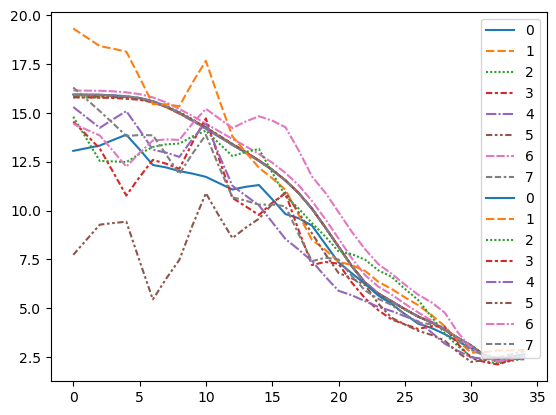

In [58]:
sns.lineplot(np.nanmean(clean['toce.npy'], axis=(2,3)).T)
sns.lineplot(np.nanmean(generated['toce.npy'], axis=(2,3)).T)

In [54]:
import seaborn as sns